In [602]:
import pandas as pd
import numpy as np
import yfinance as yf
pd.set_option('display.max_columns', 1000)

In [603]:
tickers = 'META'
start = '2010-01-01'
end = '2020-01-01'

In [604]:
ticker = pd.read_csv('../raw_data/stocks_return/adj_return_META.csv')
ticker.rename(columns={'timestamp':'date'}, inplace=True)
ticker.sort_values('date', ascending=True, inplace=True)
ticker.reset_index(inplace=True, drop=True)
ticker

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2012-05-18,42.05,45.0000,38.0000,38.2318,38.2318,573576400,0.0,1.0
1,2012-05-21,36.53,36.6600,33.0000,34.0300,34.0300,168192700,0.0,1.0
2,2012-05-22,32.61,33.5900,30.9400,31.0000,31.0000,101786600,0.0,1.0
3,2012-05-23,31.37,32.5000,31.3600,32.0000,32.0000,73600000,0.0,1.0
4,2012-05-24,32.95,33.2100,31.7700,33.0300,33.0300,50237200,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2645,2022-11-21,111.52,112.3699,109.1900,109.8600,109.8600,24351074,0.0,1.0
2646,2022-11-22,109.86,111.6200,108.3216,111.4400,111.4400,29028963,0.0,1.0
2647,2022-11-23,111.72,112.6700,110.7300,112.2400,112.2400,21343083,0.0,1.0
2648,2022-11-25,111.30,112.7300,111.0200,111.4100,111.4100,12007566,0.0,1.0


In [605]:
if '1999-12-31' in ticker['date'].values:
    ticker = ticker[ticker['date']>'1999-12-31']
    ticker.reset_index(inplace=True, drop=True)

In [606]:
# Working on eps folder
ticker_eps = pd.read_csv('../raw_data/eps/data_AAPL.csv', index_col=0)
ticker_eps.rename(columns={'reportedDate':'date'}, inplace=True)

In [607]:
ticker_eps.sort_values('date', inplace=True)
ticker_eps['date']= pd.to_datetime(ticker_eps['date'])
ticker_eps['year'] = pd.DatetimeIndex(ticker_eps['date']).year

In [608]:
if 2000 in ticker_eps['year'].values:
    ticker_eps = ticker_eps[ticker_eps['year']>=2000]
    ticker_eps.reset_index(inplace=True, drop=True)
    ticker_eps.drop(columns=['year','fiscalDateEnding', 'estimatedEPS', 'surprise'], inplace=True)

In [609]:
ticker_eps

,date,reportedEPS,surprisePercentage
0,2000-01-19,0.0400,33.3333
1,2000-04-19,0.0300,0
2,2000-07-18,0.0300,0
3,2000-10-18,0.0100,0
4,2000-12-31,-0.0097,None
...,...,...,...
87,2021-10-28,1.2400,0
88,2022-01-27,2.1000,11.1111
89,2022-04-28,1.5200,6.2937
90,2022-07-28,1.2000,3.4483


In [610]:
gold = yf.download('GC=F', start=start, end=end)
us_dollar = yf.download('DX-Y.NYB', start=start, end=end)

credit_spread = pd.read_csv('../raw_data/us_yields.csv', index_col=0) 
oil = pd.read_csv('../raw_data/oil_return.csv', index_col=0) 
orders = pd.read_csv('../raw_data/orders.csv', index_col=0) 
ffunds_rate = pd.read_csv('../raw_data/fed_funds.csv', index_col=0) 
unemployment = pd.read_csv('../raw_data/unemployment.csv', index_col=0) 
inflation_expectation = pd.read_csv('../raw_data/inflation_expectation.csv', index_col=0) 
non_farm_payroll = pd.read_csv('../raw_data/non_farm_payroll.csv', index_col=0) 
cpi = pd.read_csv('../raw_data/cpi.csv', index_col=0) 
retails = pd.read_csv('../raw_data/retail_sales.csv', index_col=0) 
gdp_capita = pd.read_csv('../raw_data/gdp_per_capita.csv', index_col=0) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [611]:
final_df = ticker.copy()

In [612]:
final_df = final_df.merge(ticker_eps, how='outer')

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [494]:
final_df = final_df.merge(credit_spread, how='outer')

In [496]:
final_df = final_df.merge(oil, how='outer', left_on='date', right_on='Date')
final_df.drop(columns='Date', inplace=True)
final_df.rename(columns={'Price':'Oil_price'}, inplace=True)

In [497]:
final_df = final_df.merge(orders, how='outer')

In [498]:
final_df = final_df.merge(ffunds_rate, how='outer')

In [499]:
final_df = final_df.merge(unemployment, how='outer')

In [500]:
final_df = final_df.merge(inflation_expectation, how='outer')

In [501]:
final_df = final_df.merge(non_farm_payroll, how='outer')

In [502]:
final_df = final_df.merge(cpi, how='outer')

In [503]:
final_df = final_df.merge(retails, how='outer')

In [504]:
final_df = final_df.merge(gdp_capita, how='outer')

In [505]:
final_df = final_df.sort_values('date', ascending=True)
final_df.reset_index(drop=True, inplace=True)

In [506]:
final_df.drop(columns=['oil_return','orders_change','unemployment_change','inf_exp_change', 'payroll_change', 'CPI_change','retail_sales_change','gdp_change'], inplace=True)

In [507]:
final_df['orders'] = final_df['orders'].fillna(method='ffill')
final_df['retail_sales'] = final_df['retail_sales'].fillna(method='ffill')
final_df['gdp_per_capita'] = final_df['gdp_per_capita'].fillna(method='ffill')
final_df['CPI'] = final_df['CPI'].fillna(method='ffill')
final_df['non_farm_payroll'] = final_df['non_farm_payroll'].fillna(method='ffill')
final_df['inf_exp'] = final_df['inf_exp'].fillna(method='ffill')
final_df['unemployment_rate'] = final_df['unemployment_rate'].fillna(method='ffill')

In [509]:
final_df.dropna(inplace=True)

In [511]:
final_df.reset_index(inplace=True, drop=True)

In [512]:
final_df

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,10Y_yield,2Y_yield,10_2_spread,Oil_price,orders,fed_funds,unemployment_rate,inf_exp,non_farm_payroll,CPI,retail_sales,gdp_per_capita
0,2000-01-04,108.250,110.62,101.190,102.50,0.780019,4574800.0,0.0,1.0,0.0649,0.0630,0.0019,25.56,185813.0,0.0538,4.0,0.03,128992.0,168.800,213709.0,45983.0
1,2000-01-05,103.750,110.56,103.000,104.00,0.791434,6949300.0,0.0,1.0,0.0662,0.0638,0.0024,24.65,185813.0,0.0541,4.0,0.03,128992.0,168.800,213709.0,45983.0
2,2000-01-06,106.120,107.00,95.000,95.00,0.722945,6856900.0,0.0,1.0,0.0657,0.0635,0.0022,24.79,185813.0,0.0554,4.0,0.03,128992.0,168.800,213709.0,45983.0
3,2000-01-07,96.500,101.00,95.500,99.50,0.757189,4113700.0,0.0,1.0,0.0652,0.0631,0.0021,24.79,185813.0,0.0561,4.0,0.03,128992.0,168.800,213709.0,45983.0
4,2000-01-10,102.000,102.25,94.750,97.75,0.743872,4509500.0,0.0,1.0,0.0657,0.0638,0.0019,24.71,185813.0,0.0574,4.0,0.03,128992.0,168.800,213709.0,45983.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693,2022-11-17,146.430,151.48,146.150,150.72,150.720000,80389400.0,0.0,1.0,0.0377,0.0443,-0.0066,81.69,273451.0,0.0383,3.7,0.05,154369.0,298.012,597492.0,60082.0
5694,2022-11-18,152.305,152.70,149.970,151.29,151.290000,74829573.0,0.0,1.0,0.0382,0.0451,-0.0069,80.07,273451.0,0.0383,3.7,0.05,154369.0,298.012,597492.0,60082.0
5695,2022-11-21,150.160,150.37,147.715,148.01,148.010000,58724070.0,0.0,1.0,0.0383,0.0448,-0.0065,79.74,273451.0,0.0383,3.7,0.05,154369.0,298.012,597492.0,60082.0
5696,2022-11-22,148.130,150.42,146.925,150.18,150.180000,51804132.0,0.0,1.0,0.0376,0.0447,-0.0071,80.95,273451.0,0.0383,3.7,0.05,154369.0,298.012,597492.0,60082.0


In [420]:
# importing relevant librairies
import numpy as np
import pandas as pd
import yfinance as yf


def load_csv(ticker: str, start: str, end: str, percentage_change :bool= False):
    """
    Creating a function that would allow us to load a csv containing all relevant features of a given ticker
    ticker should be in capital
    Start and end should be in the be following format: %YYYY-%MM-%DD
    """

    #Loading all relevant csv files
    ticker = yf.download(tickers=tickers, start=start, end=end)
    gold = yf.download('GC=F', start=start, end=end)
    us_dollar = yf.download('DX-Y.NYB', start=start, end=end)

    credit_spread = pd.read_csv('../raw_data/us_yields.csv', index_col=0)
    oil = pd.read_csv('../raw_data/oil_return.csv', index_col=0)
    orders = pd.read_csv('../raw_data/orders.csv', index_col=0)
    ffunds_rate = pd.read_csv('../raw_data/fed_funds.csv', index_col=0)
    unemployment = pd.read_csv('../raw_data/unemployment.csv', index_col=0)
    inflation_expectation = pd.read_csv('../raw_data/inflation_expectation.csv', index_col=0)
    non_farm_payroll = pd.read_csv('../raw_data/non_farm_payroll.csv', index_col=0)
    cpi = pd.read_csv('../raw_data/cpi.csv', index_col=0)
    retails = pd.read_csv('../raw_data/retail_sales.csv', index_col=0)
    gdp_capita = pd.read_csv('../raw_data/gdp_per_capita.csv', index_col=0)

    #Creating our final df and merging with relevant files
    #Still missing the returns of relevant stocks
    
    final_df = credit_spread.copy()

    final_df = final_df.merge(oil, how='outer', left_on='date', right_on='Date')
    final_df.drop(columns='Date', inplace=True)
    final_df.rename(columns={'Price':'Oil_price'}, inplace=True)

    final_df = final_df.merge(orders, how='outer')

    final_df = final_df.merge(ffunds_rate, how='outer')

    final_df = final_df.merge(unemployment, how='outer')

    final_df = final_df.merge(inflation_expectation, how='outer')

    final_df = final_df.merge(non_farm_payroll, how='outer')

    final_df = final_df.merge(cpi, how='outer')

    final_df = final_df.merge(retails, how='outer')

    final_df = final_df.merge(gdp_capita, how='outer')

    #Sorting by chronological order and resetting index
    final_df = final_df.sort_values('date', ascending=True)
    final_df.reset_index(drop=True, inplace=True)

    #Dropping irrelevant features
    final_df.drop(columns=['oil_return','orders_change','unemployment_change','inf_exp_change', 'payroll_change', 'CPI_change','retail_sales_change','gdp_change'], inplace=True)

    #Since not all features have daily data, we forward filled the missing values
    final_df['orders'] = final_df['orders'].fillna(method='ffill')
    final_df['retail_sales'] = final_df['retail_sales'].fillna(method='ffill')
    final_df['gdp_per_capita'] = final_df['gdp_per_capita'].fillna(method='ffill')
    final_df['CPI'] = final_df['CPI'].fillna(method='ffill')
    final_df['non_farm_payroll'] = final_df['non_farm_payroll'].fillna(method='ffill')
    final_df['inf_exp'] = final_df['inf_exp'].fillna(method='ffill')
    final_df['unemployment_rate'] = final_df['unemployment_rate'].fillna(method='ffill')

    if percentage_change==True:
        final_df['oil_change'] = final_df['Oil_price'].pct_change()
        final_df['orders_change'] = final_df['orders'].pct_change()
        final_df['unemployment_change'] = final_df['unemployment_rate'].pct_change()
        final_df['inf_exp_change'] = final_df['inf_exp'].pct_change()
        final_df['payroll_change'] = final_df['non_farm_payroll'].pct_change()
        final_df['CPI_change'] = final_df['CPI'].pct_change()
        final_df['retail_sales_change'] = final_df['retail_sales'].pct_change()
        final_df['gdp_change'] = final_df['gdp_per_capita'].pct_change()

    #Finally dropping our null values since they represent weekends and holidays
    final_df.dropna(inplace=True)
    final_df.reset_index(inplace=True, drop=True)
    
    
    return final_df


In [424]:
load_csv('AAPL', start='2010-01-01', end='2020-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,date,10Y_yield,2Y_yield,10_2_spread,Oil_price,orders,fed_funds,unemployment_rate,inf_exp,non_farm_payroll,CPI,retail_sales,gdp_per_capita
0,2000-01-04,0.0649,0.0630,0.0019,25.56,185813.0,0.0538,4.0,0.03,128992.0,168.800,213709.0,45983.0
1,2000-01-05,0.0662,0.0638,0.0024,24.65,185813.0,0.0541,4.0,0.03,128992.0,168.800,213709.0,45983.0
2,2000-01-06,0.0657,0.0635,0.0022,24.79,185813.0,0.0554,4.0,0.03,128992.0,168.800,213709.0,45983.0
3,2000-01-07,0.0652,0.0631,0.0021,24.79,185813.0,0.0561,4.0,0.03,128992.0,168.800,213709.0,45983.0
4,2000-01-10,0.0657,0.0638,0.0019,24.71,185813.0,0.0574,4.0,0.03,128992.0,168.800,213709.0,45983.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5697,2022-11-17,0.0377,0.0443,-0.0066,81.69,273451.0,0.0383,3.7,0.05,154369.0,298.012,597492.0,60082.0
5698,2022-11-18,0.0382,0.0451,-0.0069,80.07,273451.0,0.0383,3.7,0.05,154369.0,298.012,597492.0,60082.0
5699,2022-11-21,0.0383,0.0448,-0.0065,79.74,273451.0,0.0383,3.7,0.05,154369.0,298.012,597492.0,60082.0
5700,2022-11-22,0.0376,0.0447,-0.0071,80.95,273451.0,0.0383,3.7,0.05,154369.0,298.012,597492.0,60082.0


In [524]:
# importing relevant librairies
import numpy as np
import pandas as pd
import yfinance as yf
gold = yf.download('GC=F', start='2000-01-01', end='2022-11-23')
us_dollar = yf.download('DX-Y.NYB',start='2000-01-01', end='2022-11-23')


def load_csv(ticker: str):
    """
    Creating a function that would allow us to load a csv containing all relevant features of a given ticker
    ticker should be in capital
    Start and end should be in the be following format: %YYYY-%MM-%DD
    """

    #Loading all relevant csv files
    ticker = pd.read_csv(f'../raw_data/stocks_return/adj_return_{ticker}.csv')
    ticker.rename(columns={'timestamp':'date'}, inplace=True)
    ticker.sort_values('date', ascending=True, inplace=True)
    ticker.reset_index(inplace=True, drop=True)

    if '1999-12-31' in ticker['date'].values:
        ticker = ticker[ticker['date']>'1999-12-31']
        ticker.reset_index(inplace=True, drop=True)


    gold = yf.download('GC=F', start='2000-01-01', end='2022-11-23')
    us_dollar = yf.download('DX-Y.NYB',start='2000-01-01', end='2022-11-23')

    credit_spread = pd.read_csv('../raw_data/us_yields.csv', index_col=0)
    oil = pd.read_csv('../raw_data/oil_return.csv', index_col=0)
    orders = pd.read_csv('../raw_data/orders.csv', index_col=0)
    ffunds_rate = pd.read_csv('../raw_data/fed_funds.csv', index_col=0)
    unemployment = pd.read_csv('../raw_data/unemployment.csv', index_col=0)
    inflation_expectation = pd.read_csv('../raw_data/inflation_expectation.csv', index_col=0)
    non_farm_payroll = pd.read_csv('../raw_data/non_farm_payroll.csv', index_col=0)
    cpi = pd.read_csv('../raw_data/cpi.csv', index_col=0)
    retails = pd.read_csv('../raw_data/retail_sales.csv', index_col=0)
    gdp_capita = pd.read_csv('../raw_data/gdp_per_capita.csv', index_col=0)

    #Creating our final df and merging with relevant files
    final_df = ticker.copy()
    final_df = final_df.merge(credit_spread, how='outer')

    final_df = final_df.merge(oil, how='outer', left_on='date', right_on='Date')
    final_df.drop(columns='Date', inplace=True)
    final_df.rename(columns={'Price':'oil_price'}, inplace=True)

    final_df = final_df.merge(orders, how='outer')

    final_df = final_df.merge(ffunds_rate, how='outer')

    final_df = final_df.merge(unemployment, how='outer')

    final_df = final_df.merge(inflation_expectation, how='outer')

    final_df = final_df.merge(non_farm_payroll, how='outer')

    final_df = final_df.merge(cpi, how='outer')

    final_df = final_df.merge(retails, how='outer')

    final_df = final_df.merge(gdp_capita, how='outer')

    #Sorting by chronological order and resetting index
    final_df = final_df.sort_values('date', ascending=True)
    final_df.reset_index(drop=True, inplace=True)

    #Dropping irrelevant features
    final_df.drop(columns=['oil_return','orders_change','unemployment_change','inf_exp_change', 'payroll_change', 'CPI_change','retail_sales_change','gdp_change'], inplace=True)

    #Since not all features have daily data, we forward filled the missing values
    final_df['orders'] = final_df['orders'].fillna(method='ffill')
    final_df['retail_sales'] = final_df['retail_sales'].fillna(method='ffill')
    final_df['gdp_per_capita'] = final_df['gdp_per_capita'].fillna(method='ffill')
    final_df['CPI'] = final_df['CPI'].fillna(method='ffill')
    final_df['non_farm_payroll'] = final_df['non_farm_payroll'].fillna(method='ffill')
    final_df['inf_exp'] = final_df['inf_exp'].fillna(method='ffill')
    final_df['unemployment_rate'] = final_df['unemployment_rate'].fillna(method='ffill')

    #Finally dropping our null values since they represent weekends and holidays
    final_df.dropna(inplace=True)
    final_df.reset_index(inplace=True, drop=True)


    return final_df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [526]:
temp = load_csv('META')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [527]:
temp.isnull().sum()

date                 0
open                 0
high                 0
low                  0
close                0
adjusted_close       0
volume               0
dividend_amount      0
split_coefficient    0
10Y_yield            0
2Y_yield             0
10_2_spread          0
oil_price            0
orders               0
fed_funds            0
unemployment_rate    0
inf_exp              0
non_farm_payroll     0
CPI                  0
retail_sales         0
gdp_per_capita       0
dtype: int64

In [528]:
temp

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,10Y_yield,2Y_yield,10_2_spread,oil_price,orders,fed_funds,unemployment_rate,inf_exp,non_farm_payroll,CPI,retail_sales,gdp_per_capita
0,2012-05-18,42.05,45.0000,38.0000,38.2318,38.2318,573576400.0,0.0,1.0,0.0171,0.0032,0.0139,91.51,220785.0,0.0016,8.2,0.03,134650.0,229.815,373129.0,51702.0
1,2012-05-21,36.53,36.6600,33.0000,34.0300,34.0300,168192700.0,0.0,1.0,0.0175,0.0030,0.0145,92.57,220785.0,0.0016,8.2,0.03,134650.0,229.815,373129.0,51702.0
2,2012-05-22,32.61,33.5900,30.9400,31.0000,31.0000,101786600.0,0.0,1.0,0.0179,0.0030,0.0149,91.44,220785.0,0.0016,8.2,0.03,134650.0,229.815,373129.0,51702.0
3,2012-05-23,31.37,32.5000,31.3600,32.0000,32.0000,73600000.0,0.0,1.0,0.0173,0.0028,0.0145,89.40,220785.0,0.0015,8.2,0.03,134650.0,229.815,373129.0,51702.0
4,2012-05-24,32.95,33.2100,31.7700,33.0300,33.0300,50237200.0,0.0,1.0,0.0177,0.0029,0.0148,90.36,220785.0,0.0015,8.2,0.03,134650.0,229.815,373129.0,51702.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,2022-11-17,110.41,112.3300,109.8000,111.4500,111.4500,35093822.0,0.0,1.0,0.0377,0.0443,-0.0066,81.69,273451.0,0.0383,3.7,0.05,154369.0,298.012,597492.0,60082.0
2616,2022-11-18,113.80,114.3200,110.6200,112.0500,112.0500,33357707.0,0.0,1.0,0.0382,0.0451,-0.0069,80.07,273451.0,0.0383,3.7,0.05,154369.0,298.012,597492.0,60082.0
2617,2022-11-21,111.52,112.3699,109.1900,109.8600,109.8600,24351074.0,0.0,1.0,0.0383,0.0448,-0.0065,79.74,273451.0,0.0383,3.7,0.05,154369.0,298.012,597492.0,60082.0
2618,2022-11-22,109.86,111.6200,108.3216,111.4400,111.4400,29028963.0,0.0,1.0,0.0376,0.0447,-0.0071,80.95,273451.0,0.0383,3.7,0.05,154369.0,298.012,597492.0,60082.0


In [7]:
import pandas as pd
import numpy as np
import dynamic_portfolio.preprocess as prep
import dynamic_portfolio.utils as utils
import dynamic_portfolio.cross_validate as cv
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import warnings
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
dict_score = {}
tickers = utils.return_tickers()
for ticker in tickers:
        dict_score[ticker] = cv.cross_validate_ml(prep.ready_to_train_df(ticker), GradientBoostingRegressor())
        print(f"done for ticker {ticker} index # {tickers.index(ticker)}")

done for ticker AAPL index # 0
done for ticker MSFT index # 1
done for ticker GOOG index # 2
done for ticker AMZN index # 3
done for ticker TSLA index # 4
done for ticker UNH index # 5
done for ticker XOM index # 6
done for ticker JNJ index # 7
done for ticker WMT index # 8
done for ticker NVDA index # 9
done for ticker JPM index # 10
done for ticker V index # 11
done for ticker CVX index # 12
done for ticker PG index # 13
done for ticker LLY index # 14
done for ticker MA index # 15
done for ticker HD index # 16
done for ticker META index # 17
done for ticker BAC index # 18
done for ticker ABBV index # 19
done for ticker PFE index # 20
done for ticker KO index # 21
done for ticker MRK index # 22
done for ticker PEP index # 23
done for ticker COST index # 24
done for ticker ORCL index # 25
done for ticker AVGO index # 26
done for ticker TMO index # 27
done for ticker MCD index # 28
done for ticker CSCO index # 29
done for ticker ACN index # 30
done for ticker DHR index # 31
done for tic

done for ticker BKR index # 259
done for ticker GLW index # 260
done for ticker LYB index # 261
done for ticker ES index # 262
done for ticker BAX index # 263
done for ticker STT index # 264
done for ticker VRSK index # 265
done for ticker TROW index # 266
done for ticker WBD index # 267
done for ticker AWK index # 268
done for ticker IT index # 269
done for ticker GPN index # 270
done for ticker HRL index # 271
done for ticker FANG index # 272
done for ticker WTW index # 273
done for ticker RJF index # 274
done for ticker GPC index # 275
done for ticker IFF index # 276
done for ticker CDW index # 277
done for ticker TSCO index # 278
done for ticker FITB index # 279
done for ticker ARE index # 280
done for ticker URI index # 281
done for ticker ZBH index # 282
done for ticker K index # 283
done for ticker LEN index # 284
done for ticker EBAY index # 285
done for ticker EIX index # 286
done for ticker CBRE index # 287
done for ticker EFX index # 288
done for ticker VMC index # 289
done 

In [11]:
dict_score


{'AAPL': (0.00488569152927739, 0.01574767883588668),
 'MSFT': (0.004262860171889348, 0.011813068830004771),
 'GOOG': (0.004208015161068614, 0.011498250131454904),
 'AMZN': (0.0074387276146129855, 0.017688159161663483),
 'TSLA': (0.009156711565185622, 0.03028975616289974),
 'UNH': (0.0041616887249589654, 0.011871496057665394),
 'XOM': (0.0034416941136070508, 0.011062907409241086),
 'JNJ': (0.0026772711047400245, 0.008198597788041063),
 'WMT': (0.0030813042247438225, 0.007527595672207764),
 'NVDA': (0.008487977515409938, 0.021759492068118363),
 'JPM': (0.004585454328921303, 0.016469776991281118),
 'V': (0.003925069056090225, 0.010574373812391564),
 'CVX': (0.0036394665556525306, 0.013016594337506338),
 'PG': (0.0024595211070988846, 0.007270475736274635),
 'LLY': (0.0033642742201361927, 0.010524510436480904),
 'MA': (0.004574555674715857, 0.013298825094418066),
 'HD': (0.0034802564609751935, 0.010280434857885674),
 'META': (0.00601279014843699, 0.016855388720824854),
 'BAC': (0.0061897001

In [12]:
rmse= []
baseline = []
for key in dict_score.keys():
    rmse.append(dict_score[key][0])
    baseline.append(dict_score[key][1])
print(np.mean(rmse), np.mean(baseline) )

0.005249202000767648 0.014220135794575983


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
spx = pd.read_csv('/Users/ArthurAllonsius/Desktop/SPX.csv')

In [5]:
spx

,Date,Close
0,11/04/2022,"3,770.55"
1,11/03/2022,"3,719.89"
2,11/02/2022,"3,759.69"
3,11/01/2022,"3,856.10"
4,10/31/2022,"3,871.98"
...,...,...
248,11/10/2021,"4,646.71"
249,11/09/2021,"4,685.25"
250,11/08/2021,"4,701.70"
251,11/05/2021,"4,697.53"


In [10]:
spx_plt = spx.sort_index(ascending=False)

<AxesSubplot: ylabel='Close'>

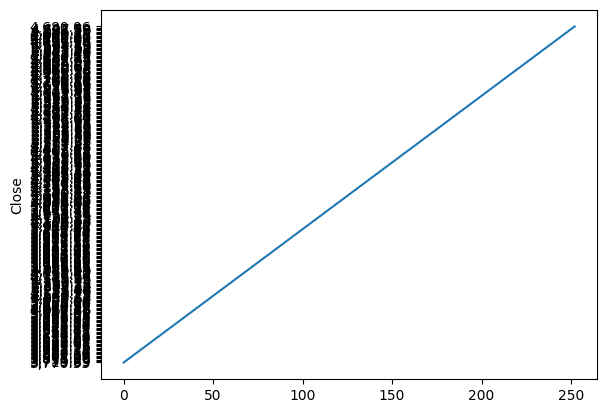

In [27]:
sns.lineplot(spx_plt['Close'])